In [1]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from mne.viz import plot_alignment, snapshot_brain_montage
from scipy.stats import zscore
import pickle
import scipy.io as sio
import os
from natsort import natsorted

In [2]:
# Load in Podcast dataset

In [225]:
podcastpath  = "data\\fft_podcast.pickle"
with open(podcastpath, 'rb') as handle:
    podcast = pickle.load(handle)

In [226]:
# zscore frequency according to all locations
# and remove 1/f by multiplying by sqrt of freq
f = podcast['frequencies']
data = zscore(np.vstack(podcast['power'])*np.sqrt(f),1)
# get frequency of max power below 50Hz
datas_to_plot3 = np.asarray([f[np.argmax(i)] for i in data[:,0:len(f[f<48])]])

# get median frequency avoid possible artefacts above 50Hz
datas_to_plot2 = []
for i in data:
    cum_sum = np.cumsum(i[0:len(f[f<48])])
    datas_to_plot2.append(f[np.argmax(cum_sum >= cum_sum[-1] / 2)])
datas_to_plot2 = np.asarray(datas_to_plot2)

In [227]:
ch_names = podcast['ch_names']
loc_mm = podcast['loc_mm']

Channel types::	seeg: 1268


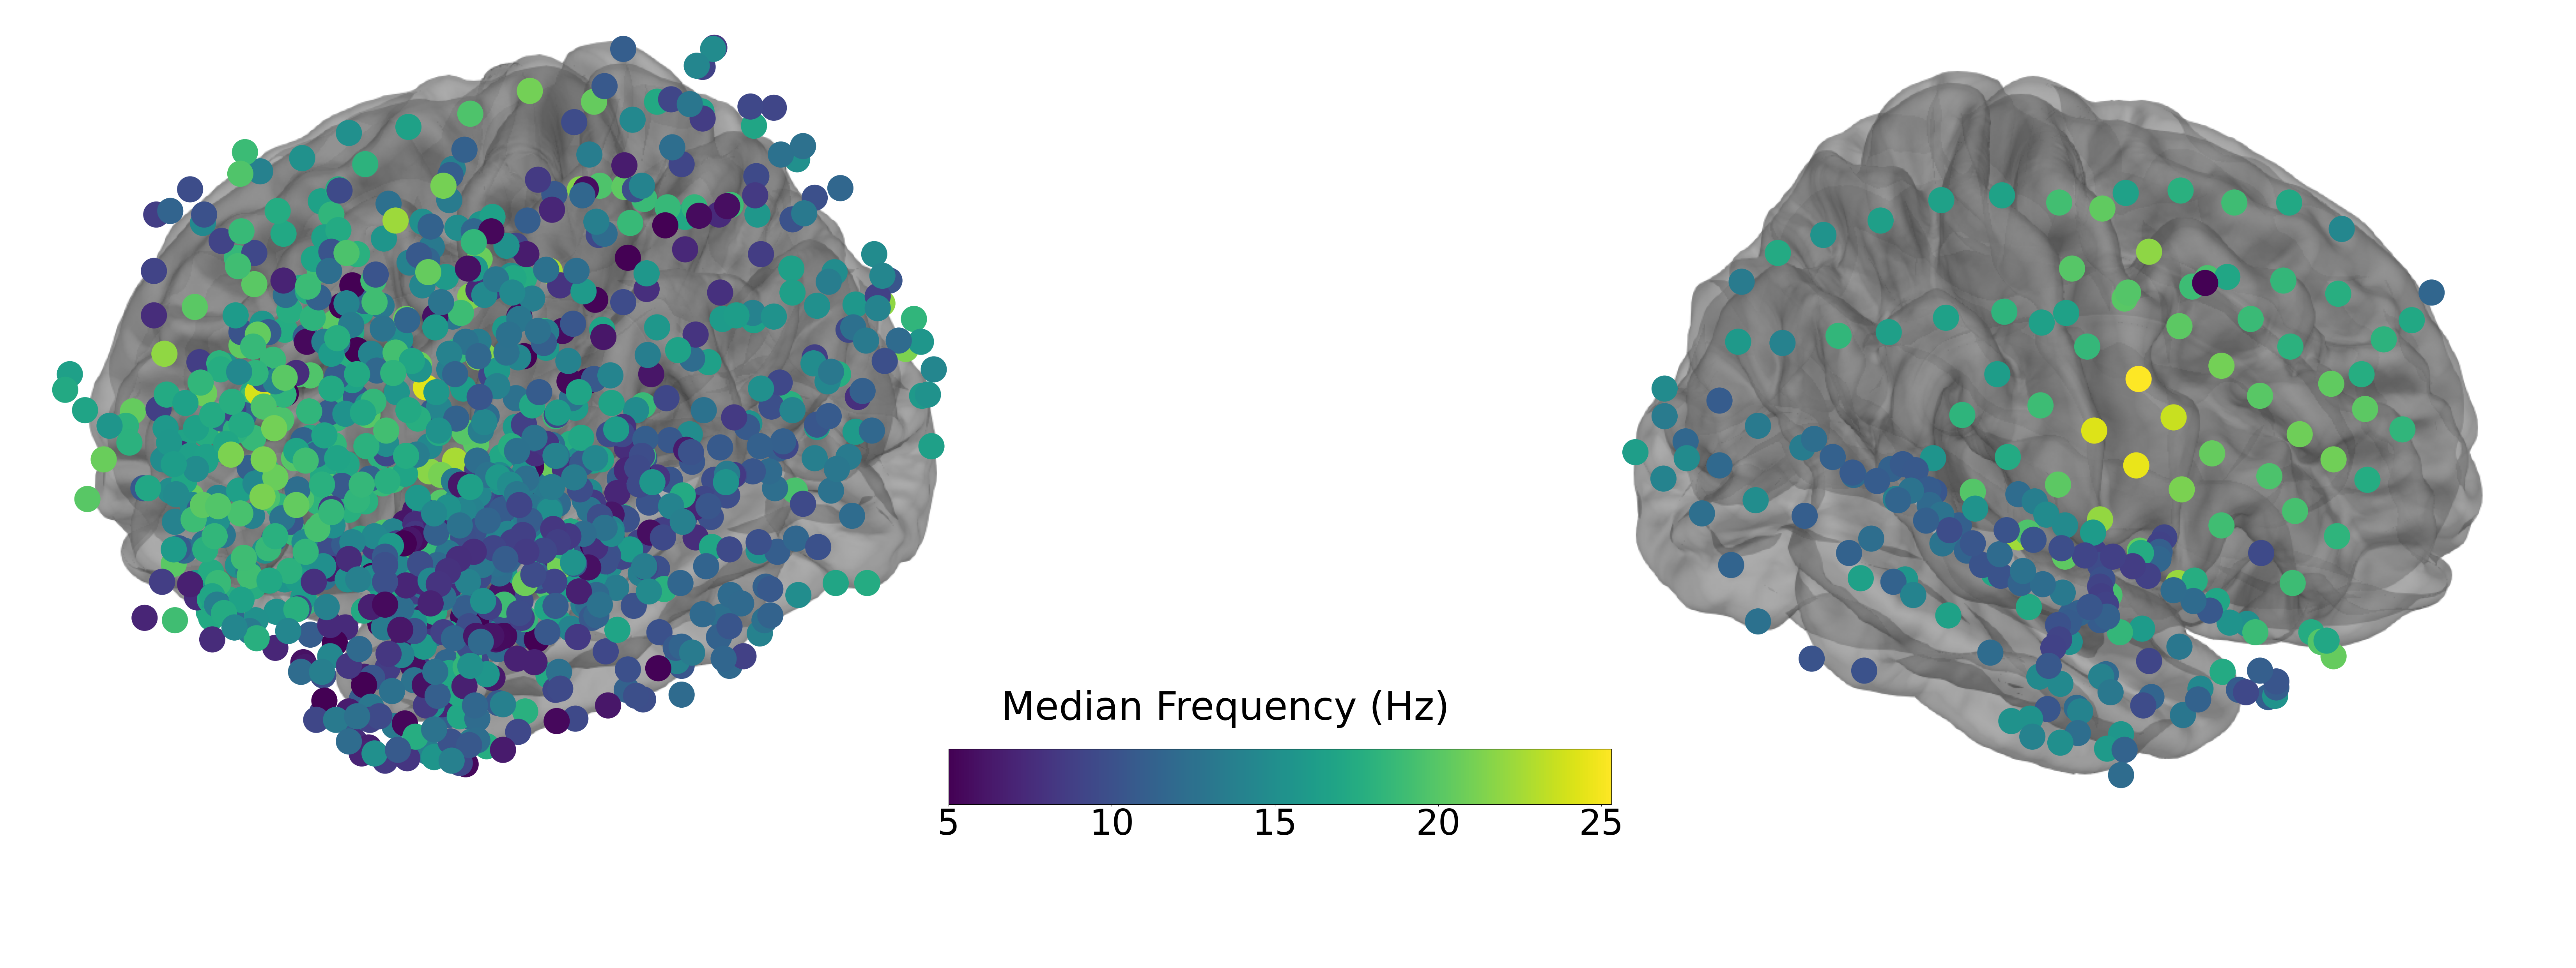

In [229]:
vmini = np.min(datas_to_plot2);
vmini = 5
vmaxi = 25
vmaxi =np.max(datas_to_plot2)

# Declare montage
ch_pos = dict(zip(ch_names, loc_mm))
montage = mne.channels.make_dig_montage(ch_pos=ch_pos, coord_frame='head')
info_ = mne.create_info(list(ch_names), 1000., ch_types='seeg').set_montage(montage)


mne.viz.set_3d_backend("notebook")
fig = mne.viz.create_3d_figure(size=(1000, 800), bgcolor='white', scene=True)
subjects_dir ="anatomy\\"
trans =  mne.read_trans(subjects_dir + '\\fsaverage\\fsaverage-trans.fif')
surfaces = {'brain': 1}

fig =plot_alignment(info=info_,trans=trans,subject='fsaverage',subjects_dir=subjects_dir,
                 surfaces=['pial'],seeg=True, interaction='terrain',coord_frame='mri',fig=fig)



mne.viz.set_3d_view(fig,azimuth=-180, elevation=-70,distance = 0.37)
xy, im = snapshot_brain_montage(fig, montage)
xy_pts1 = np.vstack([xy[ch] for ch in info_['ch_names']])

mne.viz.set_3d_view(fig,azimuth=180, elevation=70,distance = 0.37)
xy,im2 = snapshot_brain_montage(fig, montage)
xy_pts2 = np.vstack([xy[ch] for ch in info_['ch_names']])

images = [im2,im]
fig2, axs = plt.subplots(1,2,figsize=(85, 32))

for i,(ax,image) in enumerate(zip(axs.ravel(),images)):
    if (i % 2) == 0:
        ax.imshow(image, aspect='auto') 
        mask3 = loc_mm[:, 0] < 0 # Data for electrodes in left hemisphere are set to np.nan
        sizes = np.repeat(2000,len(datas_to_plot2[mask3]))
        m = ax.scatter(*xy_pts2[mask3].T, c=datas_to_plot2[mask3], s=sizes, cmap="viridis", linewidths=3.6, alpha=1,vmin=vmini,vmax=vmaxi) 
    else:
        ax.imshow(image, aspect='auto')
        mask4 = loc_mm[:, 0] > 0 # Data for electrodes in left hemisphere are set to np.nan
        sizes=np.repeat(2000,len(datas_to_plot2[mask4]))
        m = ax.scatter(*xy_pts1[mask4].T, c=datas_to_plot2[mask4], s = sizes,cmap="viridis", linewidths=3.6, alpha=1,vmin=vmini ,vmax=vmaxi) 
    ax.set_axis_off()

cax3 = fig2.add_axes([0.41, 0.2, 0.2, 0.55])
cax3.set_axis_off()
cbar3 = plt.colorbar(m, ax=cax3, orientation='horizontal',aspect=12, pad=0)
cbar3.ax.tick_params(labelsize=65)
cax3.text(0.08,0.05,'Median Frequency (Hz)',fontsize=72); #'Exponent from 1/f power fit'


Channel types::	seeg: 1268


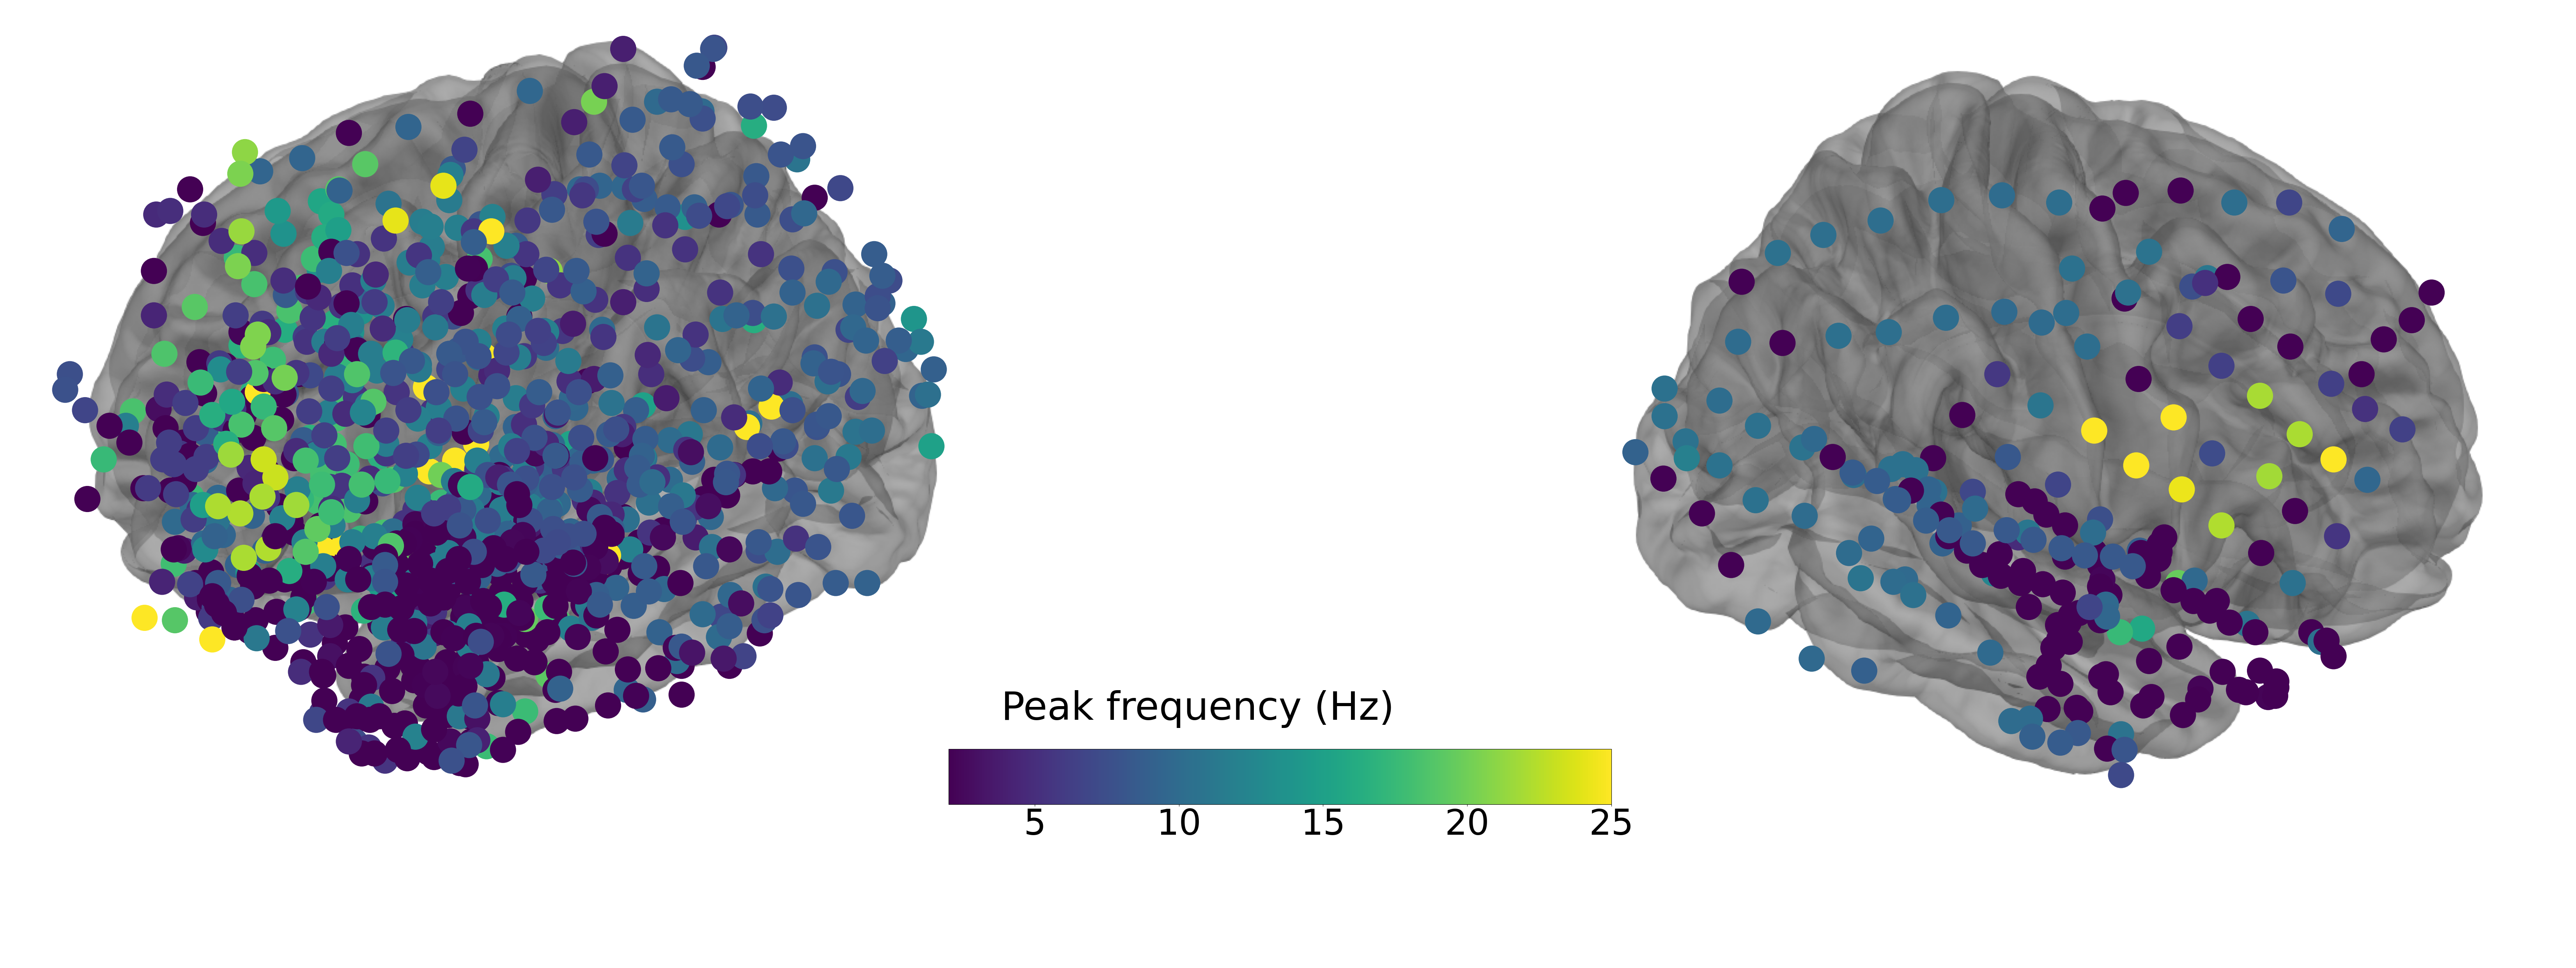

In [230]:
#vmini = np.min(datas_to_plot3);
vmini = 2
vmaxi = 25
#vmaxi =np.max(datas_to_plot2)

# Declare montage
ch_pos = dict(zip(ch_names, loc_mm))
montage = mne.channels.make_dig_montage(ch_pos=ch_pos, coord_frame='head')
info_ = mne.create_info(list(ch_names), 1000., ch_types='seeg').set_montage(montage)


mne.viz.set_3d_backend("notebook")
fig = mne.viz.create_3d_figure(size=(1000, 800), bgcolor='white', scene=True)
subjects_dir ="anatomy\\"
trans =  mne.read_trans(subjects_dir + '\\fsaverage\\fsaverage-trans.fif')
surfaces = {'brain': 1}

fig =plot_alignment(info=info_,trans=trans,subject='fsaverage',subjects_dir=subjects_dir,
                 surfaces=['pial'],seeg=True, interaction='terrain',coord_frame='mri',fig=fig)




mne.viz.set_3d_view(fig,azimuth=-180, elevation=-70,distance = 0.37)
xy, im = snapshot_brain_montage(fig, montage)
xy_pts1 = np.vstack([xy[ch] for ch in info_['ch_names']])

mne.viz.set_3d_view(fig,azimuth=180, elevation=70,distance = 0.37)
xy,im2 = snapshot_brain_montage(fig, montage)
xy_pts2 = np.vstack([xy[ch] for ch in info_['ch_names']])


images = [im2,im]
fig2, axs = plt.subplots(1,2,figsize=(85, 32))

for i,(ax,image) in enumerate(zip(axs.ravel(),images)):
    if (i % 2) == 0:
        ax.imshow(image, aspect='auto') 
        mask3 = loc_mm[:, 0] < 0 # Data for electrodes in left hemisphere are set to np.nan
        sizes = np.repeat(2000,len(datas_to_plot3[mask3]))
        m = ax.scatter(*xy_pts2[mask3].T, c=datas_to_plot3[mask3], s=sizes, cmap="viridis", linewidths=3.6, alpha=1,vmin=vmini,vmax=vmaxi) 
    else:
        ax.imshow(image, aspect='auto')
        mask4 = loc_mm[:, 0] > 0 # Data for electrodes in left hemisphere are set to np.nan
        sizes=np.repeat(2000,len(datas_to_plot3[mask4]))
        m = ax.scatter(*xy_pts1[mask4].T, c=datas_to_plot3[mask4], s = sizes,cmap="viridis", linewidths=3.6, alpha=1,vmin=vmini ,vmax=vmaxi) 
    ax.set_axis_off()

cax3 = fig2.add_axes([0.41, 0.2, 0.2, 0.55])
cax3.set_axis_off()
cbar3 = plt.colorbar(m, ax=cax3, orientation='horizontal',aspect=12, pad=0)
cbar3.ax.tick_params(labelsize=65)
cax3.text(0.08,0.05,'Peak frequency (Hz)',fontsize=72);


In [ ]:
# similar gradient in:
# Neural dynamics of predictive timing and motor engagement in music listening
# The natural frequencies of the resting human brain: An MEG-based atlas
# ? Atlas of the normal intracranial electroencephalogram: neurophysiological awake activity in different cortical areas


In [16]:
# Load in Sentences dataset

In [234]:
sentencespath  = "data\\fft_sentences.pickle"
with open(sentencespath, 'rb') as handle:
    sentences = pickle.load(handle)


In [235]:
# zscore frequency according to all locations
# and remove 1/f by multiplying by sqrt of freq
f2 = sentences['frequencies']
data2 = zscore(np.vstack(sentences['power'])*np.sqrt(f2),1)


# get median frequency avoid possible artefacts above 50Hz
datas_to_plot22 = []
for i in data2:
    cum_sum = np.cumsum(i[0:len(f2[f2<48])])
    datas_to_plot22.append(f2[np.argmax(cum_sum >= cum_sum[-1] / 2)])
datas_to_plot22 = np.asarray(datas_to_plot22)

In [236]:
#datas_to_plot22 = sentences['Exponent']

In [219]:
ch_names2 = sentences['ch_names']
loc_mm2 = sentences['loc_mm']

Channel types::	seeg: 1851


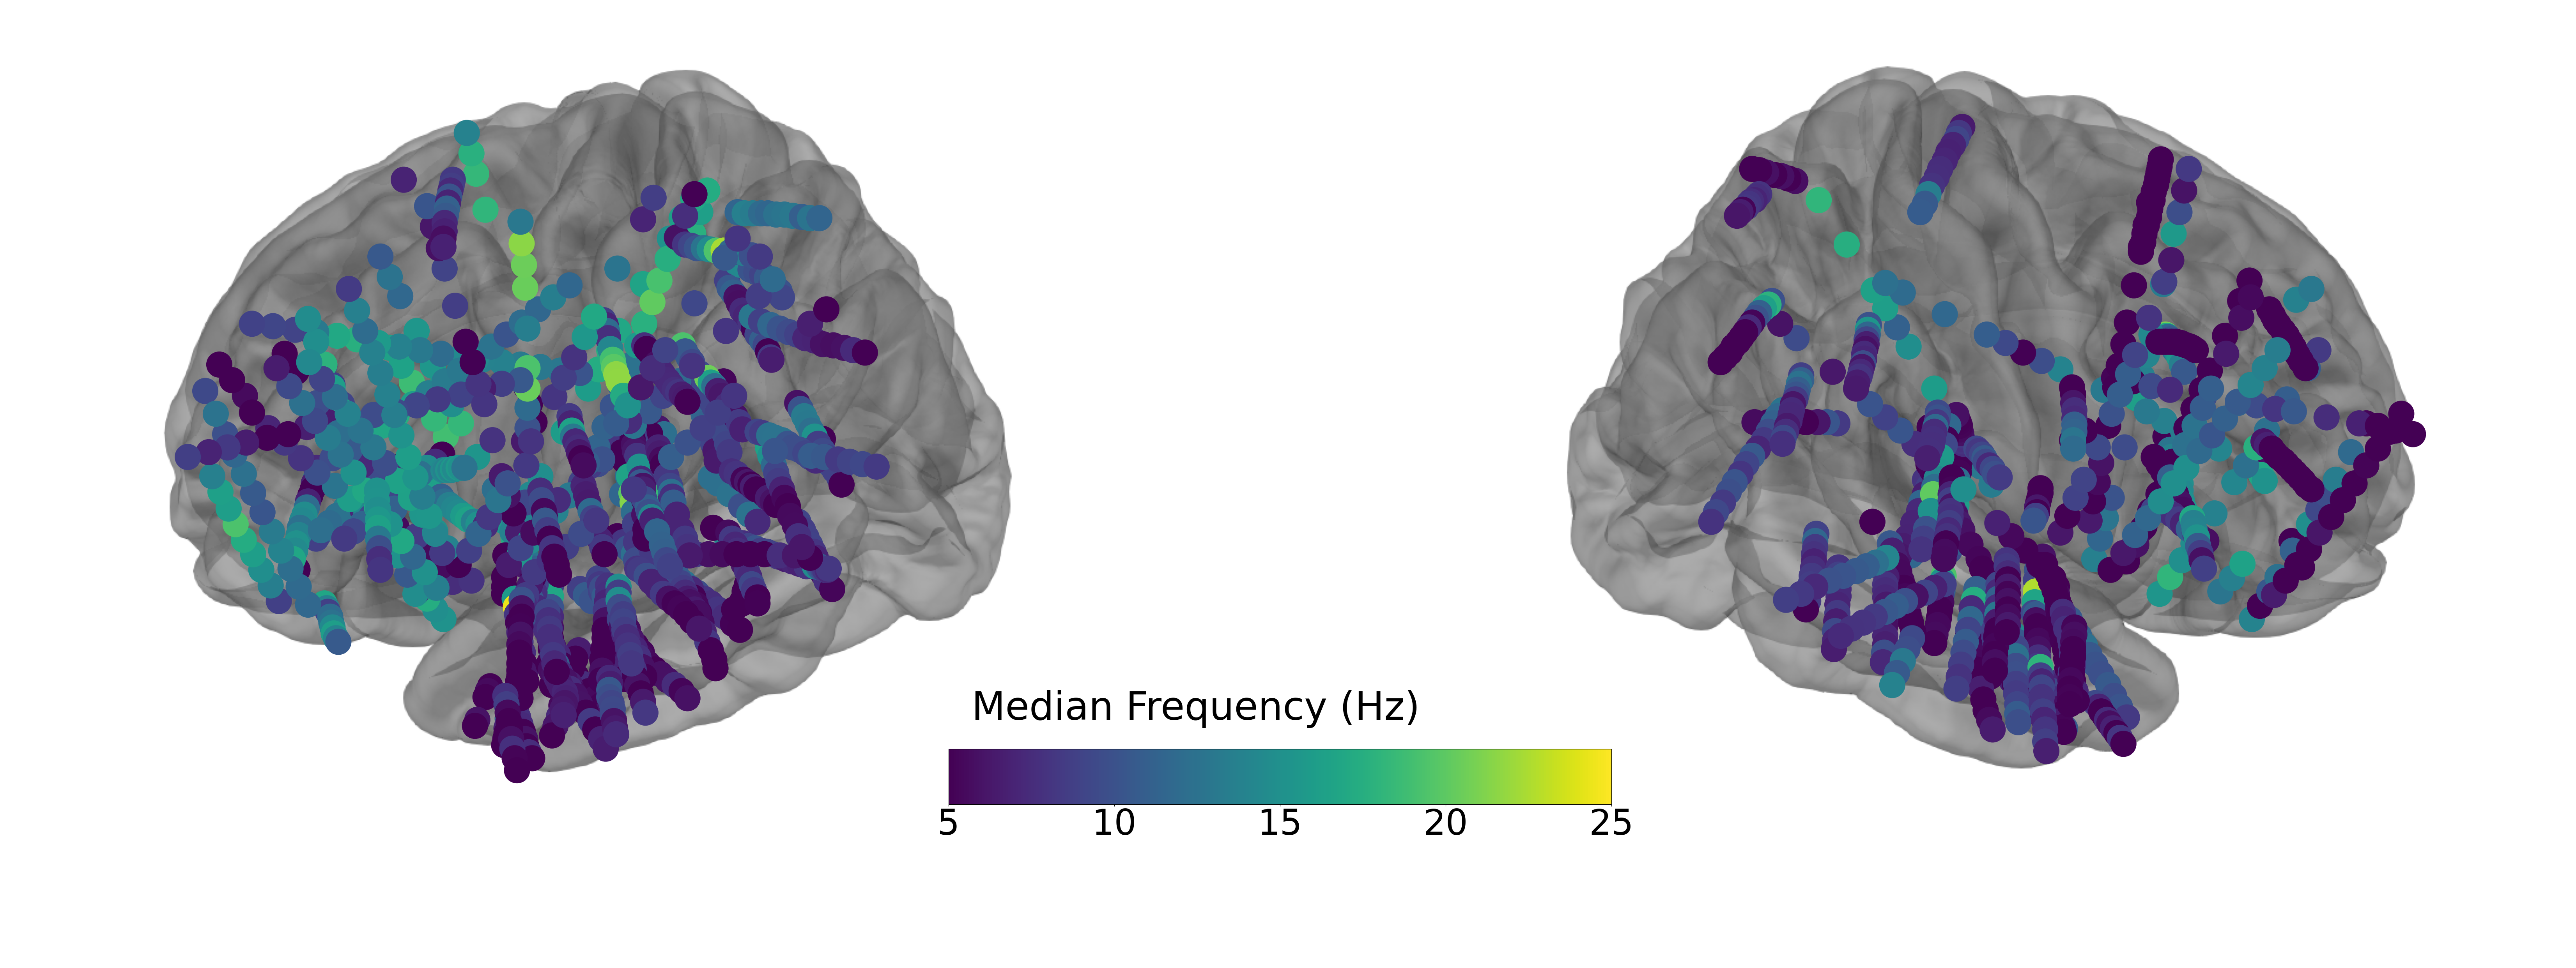

In [238]:

vmini = np.min(datas_to_plot22);
vmini = 5
vmaxi = 25
#vmaxi =np.max(datas_to_plot2)

# Declare montage
ch_pos = dict(zip(ch_names2, loc_mm2))
montage = mne.channels.make_dig_montage(ch_pos=ch_pos, coord_frame='head')
info_ = mne.create_info(list(ch_names2), 1000., ch_types='seeg').set_montage(montage)


mne.viz.set_3d_backend("notebook")
fig = mne.viz.create_3d_figure(size=(1000, 800), bgcolor='white', scene=True)
subjects_dir ="anatomy\\"
trans =  mne.read_trans(subjects_dir + '\\fsaverage\\fsaverage-trans.fif')
surfaces = {'brain': 1}

fig =plot_alignment(info=info_,trans=trans,subject='fsaverage',subjects_dir=subjects_dir,
                 surfaces=['pial'],seeg=True, interaction='terrain',coord_frame='mri',fig=fig)



mne.viz.set_3d_view(fig,azimuth=-180, elevation=-70,distance = 0.37)
xy, im = snapshot_brain_montage(fig, montage)
xy_pts1 = np.vstack([xy[ch] for ch in info_['ch_names']])

mne.viz.set_3d_view(fig,azimuth=180, elevation=70,distance = 0.37)
xy,im2 = snapshot_brain_montage(fig, montage)
xy_pts2 = np.vstack([xy[ch] for ch in info_['ch_names']])


images = [im2,im]
fig2, axs = plt.subplots(1,2,figsize=(85, 32))

for i,(ax,image) in enumerate(zip(axs.ravel(),images)):
    if (i % 2) == 0:
        ax.imshow(image, aspect='auto') 
        mask3 = loc_mm2[:, 0] < 0 # Data for electrodes in left hemisphere are set to np.nan
        sizes = np.repeat(2000,len(datas_to_plot22[mask3]))
        m = ax.scatter(*xy_pts2[mask3].T, c=datas_to_plot22[mask3], s=sizes, cmap="viridis", linewidths=3.6, alpha=1,vmin=vmini,vmax=vmaxi) 
    else:
        ax.imshow(image, aspect='auto')
        mask4 = loc_mm2[:, 0] > 0 # Data for electrodes in left hemisphere are set to np.nan
        sizes=np.repeat(2000,len(datas_to_plot22[mask4]))
        m = ax.scatter(*xy_pts1[mask4].T, c=datas_to_plot22[mask4], s = sizes,cmap="viridis", linewidths=3.6, alpha=1,vmin=vmini ,vmax=vmaxi) 
    ax.set_axis_off()

cax3 = fig2.add_axes([0.41, 0.2, 0.2, 0.55])
cax3.set_axis_off()
cbar3 = plt.colorbar(m, ax=cax3, orientation='horizontal',aspect=12, pad=0)
cbar3.ax.tick_params(labelsize=65)
cax3.text(0.035,0.05,'Median Frequency (Hz)',fontsize=72);#'Exponent from 1/f power fit'


# Monkey data

In [239]:
restingpath  = "data\\fft_resting.pickle"
with open(restingpath, 'rb') as handle:
    resting = pickle.load(handle)


In [240]:
# zscore frequency according to all locations
# and remove 1/f by multiplying by sqrt of freq
f3 = resting['frequencies']
data3 = np.vstack(resting['power'])*f3#np.sqrt(f3)#f3

datas_to_plot33 = []
for i in data3:
    cum_sum = np.cumsum(i[0:len(f3[f3<48])])
    datas_to_plot33.append(f3[np.argmax(cum_sum >= cum_sum[-1] / 2)])

# get frequency of max power below 50Hz
datas_to_plot333 = np.asarray([f3[np.argmax(i)] for i in data3[:,0:len(f3[f3<48])]])
#datas_to_plot33 = resting['Exponent']

In [241]:
electrodes = resting['loc_mm']
brain = resting['brain_picture']

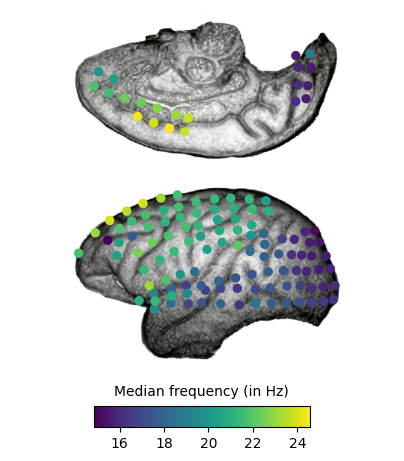

In [242]:
fig, ax = plt.subplots(1,1)
ax.imshow(brain);
m = ax.scatter(*electrodes.T, c=datas_to_plot33,sizes= [10]*len(electrodes), cmap="viridis", linewidths=3.6, alpha=1);#,vmin=0,vmax=120);
ax.set_axis_off()
cax = fig.add_axes([0.2, 0.01, 0.6, 0.3])
cax.set_axis_off()
cbar = plt.colorbar(m, ax=cax, orientation='horizontal',aspect=10, pad=0)
cbar.ax.tick_params(labelsize=10)
cax.text(0.27,0.08,'Median frequency (in Hz)',fontsize=10); #'Exponent from 1/f power fit'